Epoch 1/400
1810/1810 [==============================] - 16s 5ms/step - loss: 44.5561 - val_loss: 25.4693
Epoch 2/400
1810/1810 [==============================] - 8s 5ms/step - loss: 24.4758 - val_loss: 20.4349
Epoch 3/400
1810/1810 [==============================] - 8s 5ms/step - loss: 21.3950 - val_loss: 17.9300
Epoch 4/400
1810/1810 [==============================] - 8s 5ms/step - loss: 19.6089 - val_loss: 16.0482
Epoch 5/400
1810/1810 [==============================] - 8s 5ms/step - loss: 18.0979 - val_loss: 14.5332
Epoch 6/400
1810/1810 [==============================] - 8s 5ms/step - loss: 16.9557 - val_loss: 13.6971
Epoch 7/400
1810/1810 [==============================] - 8s 5ms/step - loss: 16.1304 - val_loss: 12.5416
Epoch 8/400
1810/1810 [==============================] - 8s 5ms/step - loss: 15.2914 - val_loss: 11.8245
Epoch 9/400
1810/1810 [==============================] - 8s 5ms/step - loss: 14.6663 - val_loss: 11.5324
Epoch 10/400
1810/1810 [==============================

1810/1810 [==============================] - 9s 5ms/step - loss: 5.4784 - val_loss: 2.4389
Epoch 158/400
1810/1810 [==============================] - 9s 5ms/step - loss: 5.5085 - val_loss: 2.3950
Epoch 159/400
1810/1810 [==============================] - 9s 5ms/step - loss: 5.4625 - val_loss: 2.3058
Epoch 160/400
1810/1810 [==============================] - 9s 5ms/step - loss: 5.4303 - val_loss: 2.3264
Epoch 161/400
1810/1810 [==============================] - 9s 5ms/step - loss: 5.4541 - val_loss: 2.4521
Epoch 162/400
1810/1810 [==============================] - 9s 5ms/step - loss: 5.5370 - val_loss: 2.3054
Epoch 163/400
1810/1810 [==============================] - 9s 5ms/step - loss: 5.5064 - val_loss: 2.2963
Epoch 164/400
1810/1810 [==============================] - 9s 5ms/step - loss: 5.4064 - val_loss: 2.2972
Epoch 165/400
1810/1810 [==============================] - 10s 5ms/step - loss: 5.4589 - val_loss: 2.3518
Epoch 166/400
1810/1810 [==============================] - 9s 5ms/st

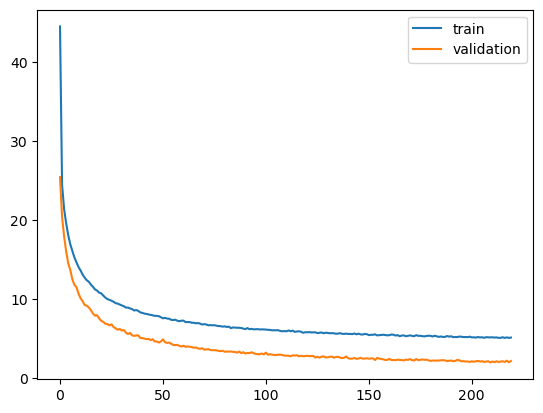

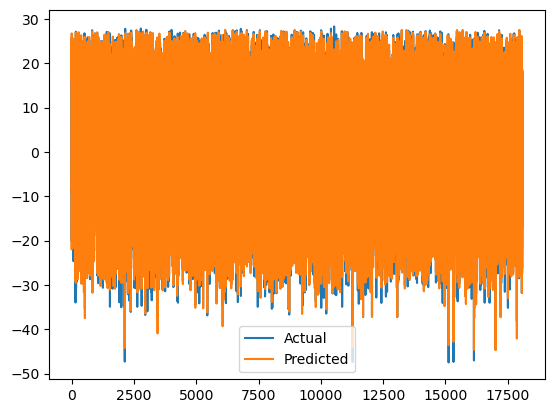

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('4_Raw_data_csv.csv')

# Define features and target
features = [
    'St1_Torque_Hip_Y', 'St1_Torque_Knee_Y', 'St1_Torque_Ankle_X', 'St1_Angle_Ankle_Y', 
     'St1_Torque_Pelvis_Z', 'St1_Torque_Pelvis_Y', 'St1_Angle_Pelvis_Y', 'St1_Angle_Knee_X',
    'St1_Angle_Hip_X', 'St1_Angle_Hip_Y']
    
target = 'St1_Angle_Ankle_X'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for LSTM (samples, timesteps, features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=400, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
# Reshape y_pred to 1D array for easier handling
y_pred = y_pred.flatten()

# Create a DataFrame with the input features and the predicted values
results = X_test.copy()
results['Predicted_Ankle_Angle_X'] = y_pred
results['Actual_Ankle_Angle_X'] = y_test.values

# Save to CSV
results.to_csv('PCA_LSTM_Raw_Ankle_Angle_X_predicted_new.csv', index=False)

# Visualize results
# Plot training & validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()